# 데이터 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = "/content/drive/Shareddrives/캡스톤디자인/동서기공 RUL data/data_350_new.json"

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_350 =  pd.read_json(path)

In [5]:
data_350.reset_index(drop=True, inplace=True) #reset_index 해주는거 까먹어서 여기서 함 ㅠㅠ

In [6]:
data_350

,index,regDate,itemType,srcData,toolPreset,toolCount,start,end,len,path,completion,failure,RUL
0,4593,1641670911000,normal_cycle,"[1016, 9415, 16709, 16064, 11858, 8672, 6277, ...",350,1,34,2282,2248,2,1,346,345
1,4594,1641671740000,normal_cycle,"[7900, 15727, 16978, 12575, 9201, 6668, 4799, ...",350,2,31,2278,2247,2,1,346,344
2,4595,1641672182000,normal_cycle,"[4617, 13439, 17742, 13861, 10176, 7405, 5351,...",350,3,32,2281,2249,2,1,346,343
3,4596,1641672628000,normal_cycle,"[14619, 17415, 13137, 9635, 6996, 5048, 3622, ...",350,4,34,2281,2247,2,1,346,342
4,4597,1641673071000,normal_cycle,"[13438, 17697, 13811, 10151, 7394, 5336, 3829,...",350,5,35,2282,2247,2,1,346,341
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28117,37249,1660174125000,normal_cycle,"[67, 425, 7930, 15747, 17117, 12702, 9306, 675...",350,339,15,2264,2249,9,96,343,4
28118,37250,1660174633000,normal_cycle,"[61, 59, 57, 55, 52, 1970, 10859, 17452, 15496...",350,340,9,2261,2252,9,96,343,3
28119,37251,1660175076000,normal_cycle,"[1042, 9434, 16739, 16256, 12005, 8786, 6369, ...",350,341,16,2264,2248,9,96,343,2
28120,37252,1660175546000,normal_cycle,"[73, 65, 4649, 13461, 17790, 13918, 10234, 744...",350,342,15,2264,2249,9,96,343,1


# srcdata 크롭

In [7]:
data_350['src_crop'] =''


In [8]:
# 'srcData' 리스트의 앞부분을 crop

for i in range(len(data_350)):
    
    for j in range(len(data_350['srcData'][i])):

        if data_350['srcData'][i][j] > 15000:
            data_350['src_crop'][i] = data_350['srcData'][i][j:]
            break
        
        

<ipython-input-8-cd0954f89f72>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_350['src_crop'][i] = data_350['srcData'][i][j:]


In [ ]:
# 'srcData' 리스트의 뒷부분을 crop
for i in range(len(data_350)):
    
    for j in range(1,len(data_350['src_crop'][i])):

        if data_350['src_crop'][i][-j] > 15000:
            data_350['src_crop'][i] = data_350['src_crop'][i][:-j]
            break
        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


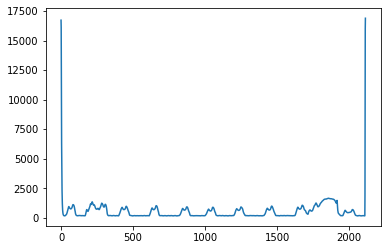

In [ ]:
plt.plot(data_350['src_crop'][1093])

In [ ]:
#리스트의 앞부분 극솟값부터 

for i in (data_350.index):
    
    for j in range(1, len(data_350['src_crop'][i])):

        if data_350['src_crop'][i][j-1] >= data_350['src_crop'][i][j] and data_350['src_crop'][i][j] <= data_350['src_crop'][i][j+1]:

            data_350['src_crop'][i] = data_350['src_crop'][i][j:]
            break
        
        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


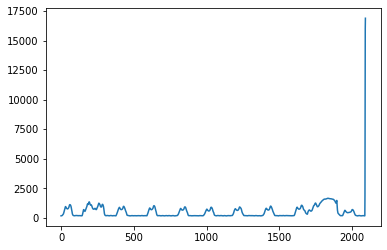

In [ ]:
plt.plot(data_350['src_crop'][1093])

In [ ]:
#리스트의 뒷부분을 crop
for i in range(len(data_350)):
    
    for j in range(1,len(data_350['src_crop'][i])):

        if data_350['src_crop'][i][-j] < 2500:
            data_350['src_crop'][i] = data_350['src_crop'][i][:-j]
            break
        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
data_350['new_len']=''

for i in range(len(data_350)):
    data_350['new_len'][i] = len(data_350['src_crop'][i]) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
data_350.to_json('/content/drive/Shareddrives/캡스톤디자인/동서기공 RUL data/crop_new.json')

In [ ]:
data_350['new_len'].unique()

array([2089, 2090, 2086, 2081, 2087, 2091, 2083, 2085, 2088, 2084, 2082,
       2080, 2092, 2079, 2095, 2094, 2093, 2102, 2110, 2111, 2106, 2078,
       2130, 2077], dtype=object)

# completion별로 탐색


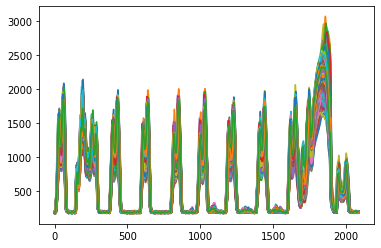

In [ ]:
for _ in range(len(data_350[data_350['completion']==1])):
    plt.plot(data_350[data_350['completion']==1]['src_crop'][_])

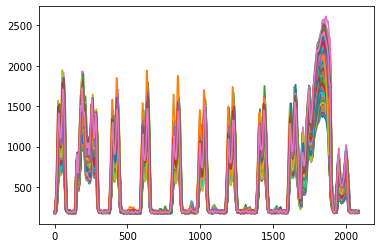

In [ ]:
for _ in (data_350[data_350['completion']==2].index):
    plt.plot(data_350[data_350['completion']==2]['src_crop'][_])

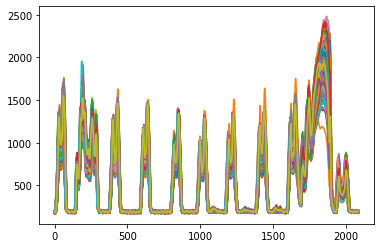

In [ ]:
for _ in (data_350[data_350['completion']==3].index):
    plt.plot(data_350[data_350['completion']==3]['src_crop'][_])

In [ ]:
for _ in (data_350[data_350['completion']==4].index):

    plt.figure(figsize=(10, 5))
    plt.plot(data_350[data_350['completion']==4]['src_crop'][_])

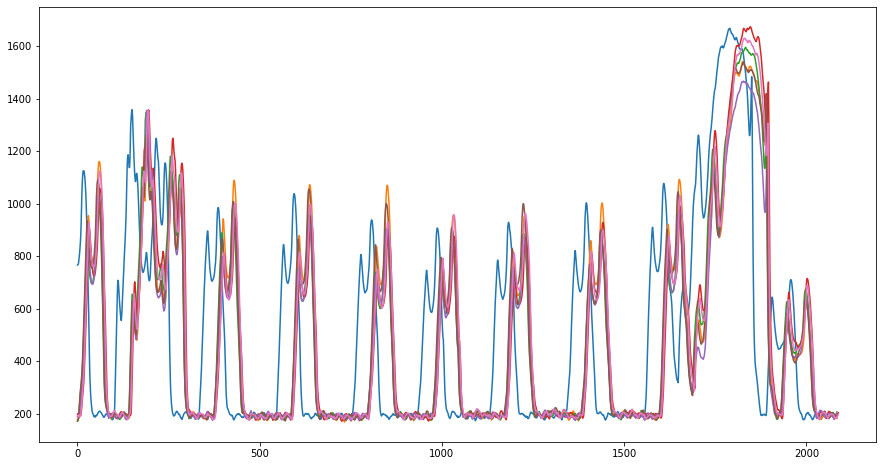

In [ ]:
plt.figure(figsize=(15,8))
for _ in (data_350[data_350['completion']==5].index[0:7]):
    plt.plot(data_350[data_350['completion']==5]['src_crop'][_])
    

In [ ]:
for _ in (data_350[data_350['completion']==5].index[0:10]):
    plt.plot(data_350[data_350['completion']==5]['src_crop'][_])